In [25]:
#data
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

raw_wine_data = "wine_raw_data.csv"
raw_wine_data_df = pd.read_csv(raw_wine_data)
reduced_wine_df = raw_wine_data_df.loc[:, ["title", "points", "price", "country", "province", "region_1", "region_2", "variety", "winery", "description"]]
reduced_wine_df = reduced_wine_df.rename(index=str, columns={'country' : 'Country', "points": 'Points'})
reduced_wine_df.head()



,title,Points,price,Country,province,region_1,region_2,variety,winery,description
0,Nicosia 2013 Vulkà Bianco (Etna),87,NaN,Italy,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,"Aromas include tropical fruit, broom, brimston..."
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),87,15.0,Portugal,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),87,14.0,US,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,87,13.0,US,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87,65.0,US,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this..."


In [29]:
# data frames for our specific data
pinot_noir = reduced_wine_df.loc[reduced_wine_df["variety"] == "Pinot Noir"]
chardonnay = reduced_wine_df.loc[reduced_wine_df["variety"] == "Chardonnay"]
cabernet = reduced_wine_df.loc[reduced_wine_df["variety"] == "Cabernet Sauvignon"]
red_blend = reduced_wine_df.loc[reduced_wine_df["variety"] == "Red Blend"]

# data frame with price points
price_df = reduced_wine_df.loc[(reduced_wine_df["price"] > 0)]


In [30]:
#ttest
p1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Pinot Noir"]["points"]
ch1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Chardonnay"]["points"]
ca1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Cabernet Sauvignon"]["points"]
red1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Red Blend"]["points"]
stats.f_oneway(p1, ch1, ca1, red1)

KeyError: 'points'

In [23]:
hold1 = reduced_wine_df
test4 = hold1.rename(index=str, columns={'country' : 'Country', "points": 'Count'})
hold1 = hold1.rename(index=str, columns={'country' : 'Country', "points": 'Points'})
test4 = test4.loc[:, ["Country", "Count"]]
hold1 = hold1.loc[:, ['Country', 'Points']]
test4 = test4.groupby(['Country']).count()
hold1 = hold1.groupby(['Country']).mean()
hold2 = hold1.merge(test4, on='Country', how='inner')
final1 = hold2.loc[(hold2['Count'] > 5)]
final1.head(10)



,Points,Count
Country,,
Argentina,86.710263,3800
Australia,88.580507,2329
Austria,90.101345,3345
Brazil,84.673077,52
Bulgaria,87.936170,141
Canada,89.369650,257
Chile,86.493515,4472
Croatia,87.219178,73
Cyprus,87.181818,11


In [35]:


hold_a = reduced_wine_df
hold_a = hold_a.rename(index=str, columns={"Points": 'Count'})
hold_a = hold_a.loc[:, ["Country", "Count"]]
hold_a = hold_a.groupby(['Country']).count()
reduced_all = reduced_wine_df.loc[:, ["Country", "Points"]]
ordered_all = reduced_all.groupby(['Country']).mean()
ordered_all = ordered_all.merge(hold_a, on='Country')
ordered_all = ordered_all.loc[(ordered_all['Count'] > 5)]
ordered_all =  ordered_all.sort_values(by=['Points'], ascending=False)
ordered_all.head(10)

hold_p = pinot_noir
hold_p = hold_p.rename(index=str, columns={'Points': 'Count'})
hold_p = hold_p.loc[:, ["Country", "Count"]]
hold_p = hold_p.groupby(['Country']).count()
reduced_p = pinot_noir.loc[:, ["Country", "Points"]]
ordered_p = reduced_p.groupby(['Country']).mean()
ordered_p = ordered_p.merge(hold_p, on='Country')
ordered_p = ordered_p.loc[(ordered_p['Count'] > 5)]
ordered_p =  ordered_p.sort_values(by=['Points'], ascending=False)
ordered_p.head(10)

hold_char = chardonnay
hold_char = hold_char.rename(index=str, columns={'Points': 'Count'})
hold_char = hold_char.loc[:, ["Country", "Count"]]
hold_char = hold_char.groupby(['Country']).count()
reduced_char = chardonnay.loc[:, ["Country", "Points"]]
ordered_char = reduced_char.groupby(['Country']).mean()
ordered_char = ordered_char.merge(hold_char, on='Country')
ordered_char = ordered_char.loc[(ordered_char['Count'] > 5)]
ordered_char =  ordered_char.sort_values(by=['Points'], ascending=False)
ordered_char.head(10)

hold_cab = cabernet
hold_cab = hold_cab.rename(index=str, columns={'Points': 'Count'})
hold_cab = hold_cab.loc[:, ["Country", "Count"]]
hold_cab = hold_cab.groupby(['Country']).count()
reduced_cab = cabernet.loc[:, ["Country", "Points"]]
ordered_cab = reduced_cab.groupby(['Country']).mean()
ordered_cab = ordered_cab.merge(hold_cab, on='Country')
ordered_cab = ordered_cab.loc[(ordered_cab['Count'] > 5)]
ordered_cab =  ordered_cab.sort_values(by=['Points'], ascending=False)
ordered_cab.head(10)

hold_red = red_blend
hold_red = hold_red.rename(index=str, columns={'Points': 'Count'})
hold_red = hold_red.loc[:, ["Country", "Count"]]
hold_red = hold_red.groupby(['Country']).count()
reduced_red = red_blend.loc[:, ["Country", "Points"]]
ordered_red = reduced_red.groupby(['Country']).mean()
ordered_red = ordered_red.merge(hold_red, on='Country')
ordered_red = ordered_red.loc[(ordered_red['Count'] > 5)]
ordered_red =  ordered_red.sort_values(by=['Points'], ascending=False)
ordered_red.head(10)

display(ordered_all.head())
display(ordered_p.head())
display(ordered_char.head())
display(ordered_cab.head())
display(ordered_red.head())

,Points,Count
Country,,
England,91.581081,74
India,90.222222,9
Austria,90.101345,3345
Germany,89.851732,2165
Canada,89.369650,257


,Points,Count
Country,,
England,91.857143,7
Austria,90.151515,99
France,89.754323,1966
US,89.607891,9885
Germany,89.436364,55


,Points,Count
Country,,
England,92.388889,18
Austria,90.301587,63
France,89.261040,2808
Canada,88.884615,26
New Zealand,88.752294,109


,Points,Count
Country,,
Canada,90.000000,7
Australia,89.251880,266
Italy,89.137405,131
US,89.025290,7315
Israel,88.828571,105


,Points,Count
Country,,
Austria,89.913043,92
Morocco,89.625000,8
Israel,89.381579,76
Bulgaria,89.181818,22
Chile,88.943765,409


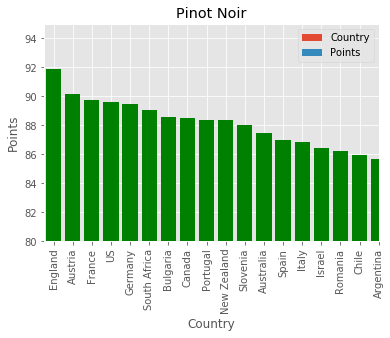

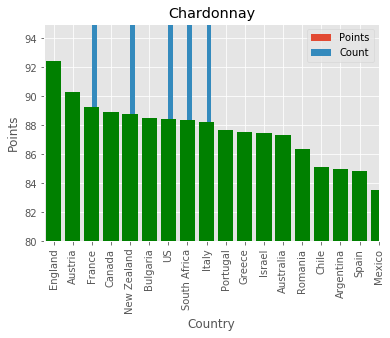

ValueError: shape mismatch: objects cannot be broadcast to a single shape

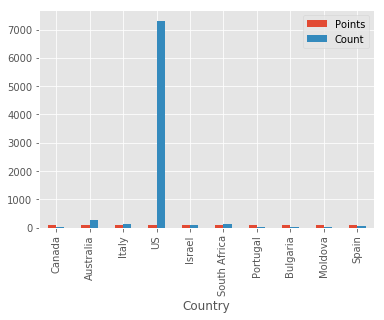

In [81]:
#ordered_p = ordered_p.loc[:, ["Country", "Points"]]

ordered_p.head(10).plot(kind='bar')
plt.style.use('ggplot')
x = ordered_p.index.values
y = ordered_p.Points
plt.bar(x_pos, y, color='green')
plt.xlabel("Country")
plt.ylabel("Points")
plt.ylim(80, 95)
plt.title("Pinot Noir")
plt.xticks(x_pos, x)
plt.show()

ordered_char.head(10).plot(kind='bar')
plt.style.use('ggplot')
x = ordered_char.index.values
y = ordered_char.Points
plt.bar(x_pos, y, color='green')
plt.xlabel("Country")
plt.ylabel("Points")
plt.ylim(80, 95)
plt.title("Chardonnay")
plt.xticks(x_pos, x)
plt.show()

ordered_cab.head(10).plot(kind='bar')
plt.style.use('ggplot')
x = ordered_cab.index.values
y = ordered_cab.Points
plt.bar(x_pos, y, color='green')
plt.xlabel("Country")
plt.ylabel("Points")
plt.ylim(80, 95)
plt.title("Cabernet Sauvignon")
plt.xticks(x_pos, x)
plt.show()

ordered_red.head(10).plot(kind='bar')
plt.style.use('ggplot')
x = ordered_red.index.values
y = ordered_red.Points
plt.bar(x_pos, y, color='green')
plt.xlabel("Country")
plt.ylabel("Points")
plt.ylim(80, 95)
plt.title("Red Blend")
plt.xticks(x_pos, x)
plt.show()